<a href="https://colab.research.google.com/github/uzhegovaelena/riskanalysis/blob/main/Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk Analysis


### Task:

- Calculate credit risk RWA and capital requirement for the bank's portfolio.
- Compare the results:
 - RWA
 - F-IRB approach (Foundation-Internal Ratings Based).
- For the PD model, the model's goodness of fit will not be evaluated.
- All given loans in the dataset are mortgage loans.
-For the lines with missing collateral values, use default LTV = 0.45.

### Metrics:

- LTV: Loan-to-Value ratio. This is the ratio of the loan amount to the appraised value of the property or asset being financed. It is expressed as a percentage.
- EAD: Exposure at Default. This is the estimated value of the outstanding loan or credit line at the time of default. This can be done using statistical models or historical data.
- RW: Risk Weight. This is the weight assigned to a specific asset or loan based on its level of risk.
- RWA: Risk Weighted Assets. This is the amount of capital that a bank or financial institution must hold to cover potential losses due to credit risk. It is calculated by multiplying the RW by the EAD.
- PD: probability of default.

### Variables:

- BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan.
- LOAN: Amount of the loan request.
- MORTDUE: Amount due on existing mortgage.
- VALUE: Value of current property.
- REASON: DebtCon = debt consolidation; HomeImp = home improvement.
- JOB: Occupational categories.
- YOJ: Years at present job.
- DEROG: Number of major derogatory reports.
- DELINQ: Number of delinquent credit lines.
- CLAGE: Age of oldest credit line in months.
- NINQ: Number of recent credit inquiries.
- CLNO: Number of credit lines.
- DEBTINC: Debt-to-income ratio.

### Descriptive analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [ ]:
!pip3 install -q xlrd

In [ ]:
# Mount my Google Drive in the Colab notebook
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# Navigate to the directory where the Excel file is located
data = pd.read_excel('/drive/My Drive/Turing college/Tasks/Risk Analyst/loan_default.xlsx')
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [ ]:
data['DEROG']

0       0.0
1       0.0
2       0.0
3       NaN
4       0.0
       ... 
5955    0.0
5956    0.0
5957    0.0
5958    0.0
5959    0.0
Name: DEROG, Length: 5960, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
data.describe(include=['int64', 'float64']).round(2).T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
LOAN,5960.0,18607.97,11207.48,1100.00,11100.00,16300.00,23300.00,89900.00
MORTDUE,5442.0,73760.82,44457.61,2063.00,46276.00,65019.00,91488.00,399550.00
VALUE,5848.0,101776.05,57385.78,8000.00,66075.50,89235.50,119824.25,855909.00
YOJ,5445.0,8.92,7.57,0.00,3.00,7.00,13.00,41.00
DEROG,5252.0,0.25,0.85,0.00,0.00,0.00,0.00,10.00
DELINQ,5380.0,0.45,1.13,0.00,0.00,0.00,0.00,15.00
CLAGE,5652.0,179.77,85.81,0.00,115.12,173.47,231.56,1168.23
NINQ,5450.0,1.19,1.73,0.00,0.00,1.00,2.00,17.00
CLNO,5738.0,21.30,10.14,0.00,15.00,20.00,26.00,71.00


In [ ]:
nan_rows = data[data['CLNO'].isnull()]
print(nan_rows)

      BAD   LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
3       1   1500      NaN       NaN      NaN      NaN   NaN    NaN     NaN   
10      1   2000  22608.0       NaN      NaN      NaN  18.0    NaN     NaN   
17      1   2200  23030.0       NaN      NaN      NaN  19.0    NaN     NaN   
51      0   3100      NaN   70400.0      NaN      NaN   NaN    NaN     NaN   
63      1   3600  61584.0   61800.0  HomeImp  ProfExe  10.0    NaN     NaN   
...   ...    ...      ...       ...      ...      ...   ...    ...     ...   
4680    0  24600      NaN  146804.0      NaN      NaN   NaN    NaN     NaN   
4789    0  25100  85337.0  104607.0  HomeImp      NaN   6.0    NaN     NaN   
4880    0  25600      NaN  147598.0      NaN      NaN   NaN    NaN     NaN   
4899    0  25700  85417.0   98179.0  HomeImp      NaN   7.0    NaN     NaN   
4947    0  26100      NaN  151429.0      NaN      NaN   NaN    NaN     NaN   

      CLAGE  NINQ  CLNO    DEBTINC  
3       NaN   NaN   NaN   

### Encrypted string data

In [ ]:
# Convert the 'REASON' column to boolean values using get_dummies()
reason_dummies = pd.get_dummies(data['REASON'])
data = pd.concat([data, reason_dummies], axis=1)
data = data.drop('REASON', axis=1)
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp
0,1,1100,25860.0,39025.0,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,0,1
1,1,1300,70053.0,68400.0,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,0,1
2,1,1500,13500.0,16700.0,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,0,1
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,0,1700,97800.0,112000.0,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,0,1
5,1,1700,30548.0,40320.0,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1
6,1,1800,48649.0,57037.0,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN,0,1
7,1,1800,28502.0,43034.0,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1
8,1,2000,32700.0,46740.0,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN,0,1
9,1,2000,NaN,62250.0,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN,0,1


In [ ]:
# Convert the 'Job' column to boolean values using get_dummies()
reason_dummies = pd.get_dummies(data['JOB'])
data = pd.concat([data, reason_dummies], axis=1)
data = data.drop('JOB', axis=1)
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,0,1,0,0,1,0,0,0
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,0,1,0,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
6,1,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,NaN,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
8,1,2000,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,NaN,0,1,0,0,1,0,0,0
9,1,2000,NaN,62250.0,16.0,0.0,0.0,115.800000,0.0,13.0,NaN,0,1,0,0,0,0,1,0


In [ ]:
data.describe(include=['int64', 'float64']).round(2).T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
LOAN,5960.0,18607.97,11207.48,1100.00,11100.00,16300.00,23300.00,89900.00
MORTDUE,5442.0,73760.82,44457.61,2063.00,46276.00,65019.00,91488.00,399550.00
VALUE,5848.0,101776.05,57385.78,8000.00,66075.50,89235.50,119824.25,855909.00
YOJ,5445.0,8.92,7.57,0.00,3.00,7.00,13.00,41.00
DEROG,5252.0,0.25,0.85,0.00,0.00,0.00,0.00,10.00
DELINQ,5380.0,0.45,1.13,0.00,0.00,0.00,0.00,15.00
CLAGE,5652.0,179.77,85.81,0.00,115.12,173.47,231.56,1168.23
NINQ,5450.0,1.19,1.73,0.00,0.00,1.00,2.00,17.00
CLNO,5738.0,21.30,10.14,0.00,15.00,20.00,26.00,71.00


### Analysing Missing Values

In [ ]:
# Check missing values
data[:].isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
DebtCon       0
HomeImp       0
Mgr           0
Office        0
Other         0
ProfExe       0
Sales         0
Self          0
dtype: int64

In [ ]:
# data_new.describe(include=['int64', 'float64']).round(2).T

In [ ]:
'''
MORTDUE: Amount due on existing mortgage.
VALUE: Value of current property.
YOJ: Years at present job.
DEROG: Number of major derogatory reports.
DELINQ: Number of delinquent credit lines.
CLAGE: Age of oldest credit line in months.
NINQ: Number of recent credit inquiries.
CLNO: Number of credit lines.
DEBTINC: Debt-to-income ratio.
'''

# mean_YOJ = round(data["YOJ"].mean())
data['YOJ'].fillna(0, inplace = True)

data['DEROG'].fillna(0, inplace = True)

data['DELINQ'].fillna(0, inplace = True)

# mean_CLAGE = round(data["CLAGE"].mean())
data['CLAGE'].fillna(0, inplace = True)

data['NINQ'].fillna(0, inplace = True)


# mean_CLNO= round(data["CLNO"].mean())
data['CLNO'].fillna(0, inplace = True)

data['DEBTINC'].fillna(0, inplace = True)


In [ ]:
# Check missing values
data[:].isnull().sum()

BAD          0
LOAN         0
MORTDUE    518
VALUE      112
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
DebtCon      0
HomeImp      0
Mgr          0
Office       0
Other        0
ProfExe      0
Sales        0
Self         0
dtype: int64

In [ ]:
# Remove rows with missing values
data.dropna(axis=0, inplace=True)

In [ ]:
# Check missing values
data[:].isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
DebtCon    0
HomeImp    0
Mgr        0
Office     0
Other      0
ProfExe    0
Sales      0
Self       0
dtype: int64

In [ ]:
data.describe(include=['int64', 'float64']).round(2).T

,count,mean,std,min,25%,50%,75%,max
BAD,5357.0,0.19,0.39,0.0,0.00,0.00,0.00,1.00
LOAN,5357.0,18606.14,11057.46,1100.0,11300.00,16400.00,23100.00,89900.00
MORTDUE,5357.0,73762.97,44189.81,2063.0,46466.00,65021.00,91350.00,399412.00
VALUE,5357.0,104998.16,54141.43,8000.0,69076.00,92179.00,123114.00,512650.00
YOJ,5357.0,8.41,7.60,0.0,2.00,6.00,13.00,41.00
DEROG,5357.0,0.21,0.75,0.0,0.00,0.00,0.00,10.00
DELINQ,5357.0,0.40,1.06,0.0,0.00,0.00,0.00,15.00
CLAGE,5357.0,172.82,89.41,0.0,111.44,170.22,227.18,1168.23
NINQ,5357.0,1.13,1.68,0.0,0.00,1.00,2.00,13.00
CLNO,5357.0,21.45,10.43,0.0,15.00,21.00,27.00,65.00


### Risk analysis using the standard approach

I use the [whole loan standardized approach (section 20.82)](https://www.bis.org/basel_framework/chapter/CRE/20.htm) to calculate these metrics:

- LTV: Loan-to-Value ratio. This is the ratio of the loan amount to the appraised value of the property or asset being financed. It is expressed as a percentage.
- EAD: Exposure at Default. This is the estimated value of the outstanding loan or credit line at the time of default. This can be done using statistical models or historical data.
- RW: Risk Weight. This is the weight assigned to a specific asset or loan based on its level of risk.
- RWA: Risk Weighted Assets. This is the amount of capital that a bank or financial institution must hold to cover potential losses due to credit risk. It is calculated by multiplying the RW by the EAD.

In [ ]:
# Calculate EAD metric
data['EAD'] = data['MORTDUE']
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self,EAD
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,0.000000,0,1,0,0,1,0,0,0,25860.0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,0.000000,0,1,0,0,1,0,0,0,70053.0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,0.000000,0,1,0,0,1,0,0,0,13500.0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,0.000000,0,1,0,1,0,0,0,0,97800.0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0,30548.0
6,1,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,0.000000,0,1,0,0,1,0,0,0,48649.0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0,28502.0
8,1,2000,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,0.000000,0,1,0,0,1,0,0,0,32700.0
11,1,2000,20627.0,29800.0,11.0,0.0,1.0,122.533333,1.0,9.0,0.000000,0,1,0,1,0,0,0,0,20627.0
12,1,2000,45000.0,55000.0,3.0,0.0,0.0,86.066667,2.0,25.0,0.000000,0,1,0,0,1,0,0,0,45000.0


In [ ]:
# Calculate LTV metric
data['LTV'] = data['EAD']/ data['VALUE']
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self,EAD,LTV
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,...,0,1,0,0,1,0,0,0,25860.0,0.662652
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,...,0,1,0,0,1,0,0,0,70053.0,1.024167
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,...,0,1,0,0,1,0,0,0,13500.0,0.808383
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,...,0,1,0,1,0,0,0,0,97800.0,0.873214
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,...,0,1,0,0,1,0,0,0,30548.0,0.757639
6,1,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,...,0,1,0,0,1,0,0,0,48649.0,0.852938
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,...,0,1,0,0,1,0,0,0,28502.0,0.662314
8,1,2000,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,...,0,1,0,0,1,0,0,0,32700.0,0.699615
11,1,2000,20627.0,29800.0,11.0,0.0,1.0,122.533333,1.0,9.0,...,0,1,0,1,0,0,0,0,20627.0,0.692181
12,1,2000,45000.0,55000.0,3.0,0.0,0.0,86.066667,2.0,25.0,...,0,1,0,0,1,0,0,0,45000.0,0.818182


In [ ]:
# Calculate RW metric

data['RW'] = 0

# iterate over each row in the table and calculate RW values
for i, row in data.iterrows():
    LTV = row['LTV']
    if LTV <= 0.5:
        RW = 0.2
    elif LTV <= 0.6:
        RW = 0.25
    elif LTV <= 0.8:
        RW = 0.3
    elif LTV <= 0.9:
        RW = 0.4
    elif LTV <= 1:
        RW = 0.5
    else:
        RW = 0.7
    # assign the calculated RW value to the corresponding row in the new column
    data.at[i, 'RW'] = RW
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self,EAD,LTV,RW
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,...,1,0,0,1,0,0,0,25860.0,0.662652,0.3
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,...,1,0,0,1,0,0,0,70053.0,1.024167,0.7
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,...,1,0,0,1,0,0,0,13500.0,0.808383,0.4
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,...,1,0,1,0,0,0,0,97800.0,0.873214,0.4
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,...,1,0,0,1,0,0,0,30548.0,0.757639,0.3
6,1,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,...,1,0,0,1,0,0,0,48649.0,0.852938,0.4
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,...,1,0,0,1,0,0,0,28502.0,0.662314,0.3
8,1,2000,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,...,1,0,0,1,0,0,0,32700.0,0.699615,0.3
11,1,2000,20627.0,29800.0,11.0,0.0,1.0,122.533333,1.0,9.0,...,1,0,1,0,0,0,0,20627.0,0.692181,0.3
12,1,2000,45000.0,55000.0,3.0,0.0,0.0,86.066667,2.0,25.0,...,1,0,0,1,0,0,0,45000.0,0.818182,0.4


In [ ]:
#test LTV>=0.8
data[data['LTV'] >= 0.8].head(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self,EAD,LTV,RW
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,...,1,0,0,1,0,0,0,70053.0,1.024167,0.7
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,...,1,0,0,1,0,0,0,13500.0,0.808383,0.4
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,...,1,0,1,0,0,0,0,97800.0,0.873214,0.4
6,1,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,...,1,0,0,1,0,0,0,48649.0,0.852938,0.4
12,1,2000,45000.0,55000.0,3.0,0.0,0.0,86.066667,2.0,25.0,...,1,0,0,1,0,0,0,45000.0,0.818182,0.4
14,1,2100,71000.0,83850.0,8.0,0.0,1.0,123.000000,0.0,16.0,...,1,0,0,1,0,0,0,71000.0,0.846750,0.4
16,1,2200,90957.0,102600.0,7.0,2.0,6.0,122.900000,1.0,22.0,...,1,1,0,0,0,0,0,90957.0,0.886520,0.4
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,...,1,0,1,0,0,0,0,102370.0,0.846362,0.4
20,1,2300,37626.0,46200.0,3.0,0.0,1.0,122.266667,1.0,14.0,...,1,0,0,1,0,0,0,37626.0,0.814416,0.4
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,...,1,0,1,0,0,0,0,98449.0,0.840044,0.4


In [ ]:
# Calculate RWA metric
data['RWA'] = data['EAD']* data['RW']
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,Mgr,Office,Other,ProfExe,Sales,Self,EAD,LTV,RW,RWA
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,...,0,0,1,0,0,0,25860.0,0.662652,0.3,7758.0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,...,0,0,1,0,0,0,70053.0,1.024167,0.7,49037.1
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,...,0,0,1,0,0,0,13500.0,0.808383,0.4,5400.0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,...,0,1,0,0,0,0,97800.0,0.873214,0.4,39120.0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,...,0,0,1,0,0,0,30548.0,0.757639,0.3,9164.4
6,1,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,...,0,0,1,0,0,0,48649.0,0.852938,0.4,19459.6
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,...,0,0,1,0,0,0,28502.0,0.662314,0.3,8550.6
8,1,2000,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,...,0,0,1,0,0,0,32700.0,0.699615,0.3,9810.0
11,1,2000,20627.0,29800.0,11.0,0.0,1.0,122.533333,1.0,9.0,...,0,1,0,0,0,0,20627.0,0.692181,0.3,6188.1
12,1,2000,45000.0,55000.0,3.0,0.0,0.0,86.066667,2.0,25.0,...,0,0,1,0,0,0,45000.0,0.818182,0.4,18000.0


In [ ]:
# total_ead = 0

# Filter the dataframe where BAD is not equal to 1
data2 = data[data['BAD'] != 1]

# Calculate the sum of the RWA column in the filtered dataframe
total_rwa = data2['RWA'].sum()

# Calculate the sum of the EAD column in the filtered dataframe
total_ead = data2['EAD'].sum()


print('Total EAD:', round(total_ead,2))
print('Total RWA:', round(total_rwa,2))
print('RW:', round(total_rwa/total_ead*100,2),'%')
print('Capital requirement:', round(total_rwa*0.08,2))

Total EAD: 326180696.63
Total RWA: 107574769.94
RW: 32.98 %
Capital requirement: 8605981.6


### Determine outliers



In [ ]:
# # Create a box plot for each parameter on one chart
# sns.boxplot(data=data)

# # Show the plot
# plt.show()

In [ ]:
# data.hist(figsize=(12,12))

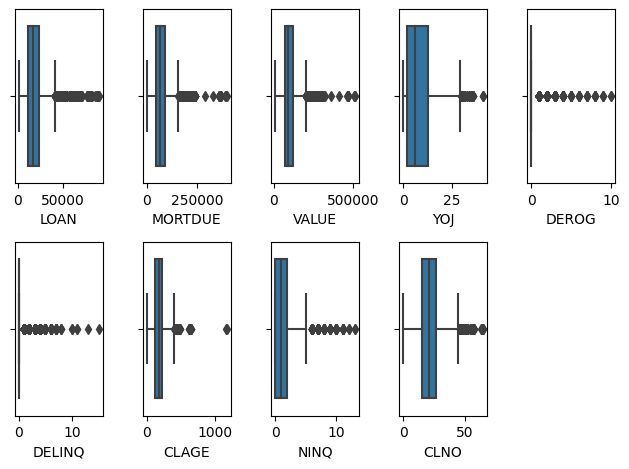

In [ ]:
# Create the first box plot
plt.subplot(2, 5, 1)  # 1 row, 2 columns, first subplot

plt.subplot(2, 5, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x='LOAN', data=data)
plt.title('')

# Create the second box plot
plt.subplot(2, 5, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x='MORTDUE', data=data)
plt.title('')

# Create the 3 box plot
plt.subplot(2, 5, 3)  # 1 row, 2 columns, second subplot
sns.boxplot(x='VALUE', data=data)
plt.title('')

# Create the 4 box plot
plt.subplot(2, 5, 4)  # 1 row, 2 columns, second subplot
sns.boxplot(x='YOJ', data=data)
plt.title('')

# Create the 5 box plot
plt.subplot(2, 5, 5)  # 1 row, 2 columns, second subplot
sns.boxplot(x='DEROG', data=data)
plt.title('')

# Create the 6 box plot
plt.subplot(2, 5, 6)  # 1 row, 2 columns, second subplot
sns.boxplot(x='DELINQ', data=data)
plt.title('')

# Create the 7 box plot
plt.subplot(2, 5, 7)  # 1 row, 2 columns, second subplot
sns.boxplot(x='CLAGE', data=data)
plt.title('')

# Create the 8 box plot
plt.subplot(2, 5, 8)  # 1 row, 2 columns, second subplot
sns.boxplot(x='NINQ', data=data)
plt.title('')

# Create the 9 box plot
plt.subplot(2, 5, 9)  # 1 row, 2 columns, second subplot
sns.boxplot(x='CLNO', data=data)
plt.title('')
# Create the 10 box plot
# plt.subplot(2, 5, 10)  # 1 row, 2 columns, second subplot
# sns.boxplot(x='DEBTINC', data=data_new)
# plt.title('')

# MORTDUE	VALUE	YOJ	DEROG	DELINQ	CLAGE	NINQ	CLNO	DEBTINC


# Adjust the spacing between subplots and show the plot
plt.tight_layout()
plt.show()

### Fix outliers

In [ ]:
#Fix YOJ
# Calculate the upper fence
Q3 = np.percentile(data['YOJ'], 75)
IQR = np.percentile(data['YOJ'], 75) - np.percentile(data['YOJ'], 25)
upper_fence = Q3 + 1.5 * IQR

# Replace outliers with the maximum value
data.loc[data['YOJ'] > upper_fence, 'YOJ'] = data['YOJ'].clip(upper=upper_fence)

#Fix CLNO
# Calculate the upper fence
Q3 = np.percentile(data['CLNO'], 75)
IQR = np.percentile(data['CLNO'], 75) - np.percentile(data['CLNO'], 25)
upper_fence = Q3 + 1.5 * IQR

# Replace outliers with the maximum value
data.loc[data['CLNO'] > upper_fence, 'CLNO'] = data['CLNO'].clip(upper=upper_fence)

#Fix NINQ
# Calculate the upper fence
Q3 = np.percentile(data['NINQ'], 75)
IQR = np.percentile(data['NINQ'], 75) - np.percentile(data['NINQ'], 25)
upper_fence = Q3 + 1.5 * IQR

# Replace outliers with the maximum value
data.loc[data['NINQ'] > upper_fence, 'NINQ'] = data['NINQ'].clip(upper=upper_fence)

#Fix CLAGE
# Calculate the upper fence
Q3 = np.percentile(data['CLAGE'], 75)
IQR = np.percentile(data['CLAGE'], 75) - np.percentile(data['CLAGE'], 25)
upper_fence = Q3 + 1.5 * IQR

# Replace outliers with the maximum value
data.loc[data['CLAGE'] > upper_fence, 'CLAGE'] = data['CLAGE'].clip(upper=upper_fence)

In [ ]:
data.describe(include=['int64', 'float64']).round(2).T

,count,mean,std,min,25%,50%,75%,max
BAD,5357.0,0.19,0.39,0.00,0.00,0.00,0.00,1.00
LOAN,5357.0,18606.14,11057.46,1100.00,11300.00,16400.00,23100.00,89900.00
MORTDUE,5357.0,73762.97,44189.81,2063.00,46466.00,65021.00,91350.00,399412.00
VALUE,5357.0,104998.16,54141.43,8000.00,69076.00,92179.00,123114.00,512650.00
YOJ,5357.0,8.38,7.52,0.00,2.00,6.00,13.00,29.50
DEROG,5357.0,0.21,0.75,0.00,0.00,0.00,0.00,10.00
DELINQ,5357.0,0.40,1.06,0.00,0.00,0.00,0.00,15.00
CLAGE,5357.0,171.58,83.81,0.00,111.44,170.22,227.18,400.80
NINQ,5357.0,1.04,1.37,0.00,0.00,1.00,2.00,5.00
CLNO,5357.0,21.27,9.93,0.00,15.00,21.00,27.00,45.00


Also I can use the log function to fix outliers

In [ ]:
# data.describe(include=['int64', 'float64']).round(2).T

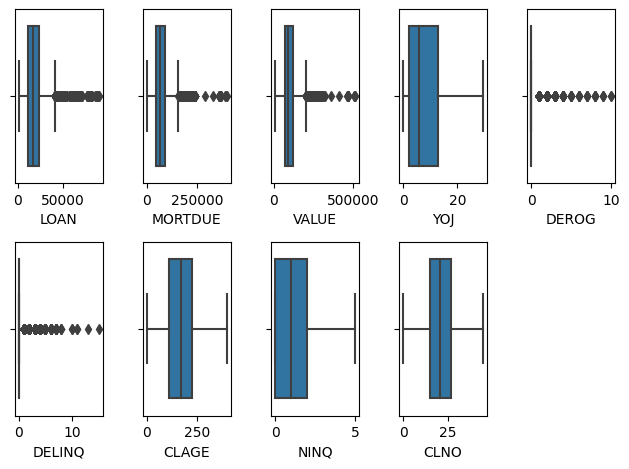

In [ ]:
# Create the first box plot
plt.subplot(2, 5, 1)  # 1 row, 2 columns, first subplot

plt.subplot(2, 5, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x='LOAN', data=data)
plt.title('')

# Create the second box plot
plt.subplot(2, 5, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x='MORTDUE', data=data)
plt.title('')

# Create the 3 box plot
plt.subplot(2, 5, 3)  # 1 row, 2 columns, second subplot
sns.boxplot(x='VALUE', data=data)
plt.title('')

# Create the 4 box plot
plt.subplot(2, 5, 4)  # 1 row, 2 columns, second subplot
sns.boxplot(x='YOJ', data=data)
plt.title('')

# Create the 5 box plot
plt.subplot(2, 5, 5)  # 1 row, 2 columns, second subplot
sns.boxplot(x='DEROG', data=data)
plt.title('')

# Create the 6 box plot
plt.subplot(2, 5, 6)  # 1 row, 2 columns, second subplot
sns.boxplot(x='DELINQ', data=data)
plt.title('')

# Create the 7 box plot
plt.subplot(2, 5, 7)  # 1 row, 2 columns, second subplot
sns.boxplot(x='CLAGE', data=data)
plt.title('')

# Create the 8 box plot
plt.subplot(2, 5, 8)  # 1 row, 2 columns, second subplot
sns.boxplot(x='NINQ', data=data)
plt.title('')

# Create the 9 box plot
plt.subplot(2, 5, 9)  # 1 row, 2 columns, second subplot
sns.boxplot(x='CLNO', data=data)
plt.title('')
# Create the 10 box plot
# plt.subplot(2, 5, 10)  # 1 row, 2 columns, second subplot
# sns.boxplot(x='DEBTINC', data=data_new)
# plt.title('')

# MORTDUE	VALUE	YOJ	DEROG	DELINQ	CLAGE	NINQ	CLNO	DEBTINC


# Adjust the spacing between subplots and show the plot
plt.tight_layout()
plt.show()

### Imbalanced data

In [ ]:
# data_new = data.drop(['REASON',	'JOB'], axis = 1)

In [ ]:
# # Split the data into features and target
# X = data_new.drop('BAD', axis=1)
# y = data_new['BAD']

# # Initialize a logistic regression classifier with class weighting
# clf = LogisticRegression(class_weight='balanced')

# # Fit the classifier to the data
# clf.fit(X, y)

In [ ]:
# data_new.describe(include=['int64', 'float64']).round(2).T

### Logistic Regression

In the context of credit risk modeling, the "BAD" parameter typically represents the binary outcome of a loan default,
with 1 indicating that the borrower has defaulted on their loan or is seriously delinquent,
and 0 indicating that the borrower has paid their loan.

In the logistic regression model for calculating PD,
we are interested in predicting the probability of default (PD) based on the input features.
Therefore, the "BAD" parameter is chosen as the response variable,
as it is the binary outcome that we are trying to predict using the other variables in the model.


random_state is a parameter to set a fixed random seed for the random number generator.
The value 42 is just an arbitrary number often used as a random seed,
popularized by the book ["The Hitchhiker's Guide to the Galaxy" by Douglas Adams](https://grsahagian.medium.com/what-is-random-state-42-d803402ee76b).

In [ ]:
X = data.drop("BAD",axis = 1)
Y = data["BAD"]
X = np.array(X)
Y = np.array(Y)
# print(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 42,test_size = 0.2)

In [ ]:
log_reg = LogisticRegression(random_state = 42, solver='newton-cg', class_weight='balanced')
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(class_weight='balanced', random_state=42, solver='newton-cg')

In [ ]:
trainscore=log_reg.score(X_train,y_train)
round(trainscore,4)

0.8135

In [ ]:
testscore=log_reg.score(X_test,y_test)
round(testscore,4)

0.8116

In [ ]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

**Confusion matrix:**
The predicted outcomes are columns and the true outcomes are the rows. The diagonal elements of the matrix show the number of correct predictions.

- True Negarive (TN) - Actual 0 - Predictive 0
- True Positive (TP) - A1 - P1
- False Negative (FN) - A1 - P0
- False Positive (FP) - A0 - P1

Text(0.5, 23.52222222222222, 'Predicted label')

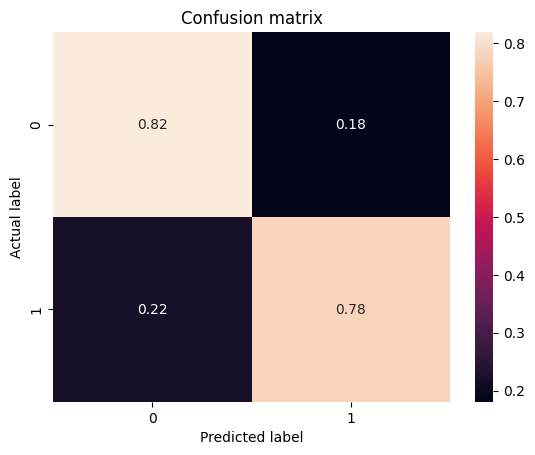

In [ ]:
cf=metrics.confusion_matrix(y_test,y_pred,normalize='true')
sns.heatmap(pd.DataFrame(cf),annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The confusion matrix shows that the model correctly classified 0 as 0 in 83% of cases and 1 as 1 in 74% of cases.

- Accuracy: the proportion of correct predictions out of all predictions. It is calculated as (TP+TN)/(TP+FP+TN+FN).
- Precision: the proportion of true positives out of all predicted positives. It is calculated as TP/(TP+FP).
- Recall (Sensitivity): the proportion of true positives out of all actual positives. It is calculated as TP/(TP+FN).
- F1 score: the harmonic mean of precision and recall. It is calculated as 2*(precision * recall)/(precision + recall).

In [ ]:
print("Accuracy : ", round(metrics.accuracy_score(y_test, y_pred)*100,2),'%')
print('Precision:', round(metrics.precision_score(y_test, y_pred)*100,2),'%')
print('Recall:', round(metrics.recall_score(y_test, y_pred)*100,2),'%')
print('F1 score:', round(metrics.f1_score(y_test, y_pred)*100,2),'%')
print()
print('Classification report:')
print(metrics.classification_report(y_test, y_pred))

Accuracy :  81.16 %
Precision: 51.1 %
Recall: 77.99 %
F1 score: 61.74 %

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       863
           1       0.51      0.78      0.62       209

    accuracy                           0.81      1072
   macro avg       0.72      0.80      0.75      1072
weighted avg       0.86      0.81      0.82      1072



The overall accuracy of the model is 0.81, meaning that it correctly classified 81% of the instances. But this dataset has imbalance data (BAD).

The precision of the model is 0.51, which means that out of all the instances that the model predicted as positive (1), only 51% were actually positive.

The recall of the model is 0.78, which means that out of all the actual positive instances, the model correctly identified 77.99% of them.

The F1 score is a measure of the model's accuracy that considers both precision and recall. It is calculated as the harmonic mean of precision and recall, and its value in this case is 61.74%.

### F-IRB approach

F-IRB (Foundation Internal Ratings-Based) approach, which is a method used by banks to calculate the amount of capital they need to hold for credit risk under the Basel III framework.

The F-IRB approach allows banks to use their own internal models to estimate risk parameters such as probability of default (PD), loss given default (LGD), and exposure at default (EAD). These risk parameters are then used to calculate the amount of capital required to cover credit risk for a given portfolio of loans or other credit exposures.

The F-IRB approach is designed to promote a more risk-sensitive approach to capital adequacy, where banks hold more capital for riskier assets and less capital for less risky assets. This can help to promote a safer and more stable banking system, as banks are incentivized to make more prudent lending decisions and to hold sufficient capital to absorb potential losses.

In [ ]:
# Y_forecast
# Get the predicted probabilities for the positive class
proba = log_reg.predict_proba(X)[:, 1]

# Extract the PD
PD = proba.mean()
print('Probability of default:', round(PD,4))

# Calculate the odds of default
ood = proba / (1 - proba)

# Add the OOD column to the DataFrame
data['OOD'] = ood
data['Y_forecast'] = data['OOD']/ (1+data['OOD'])
data.head(10)

Probability of default: 0.387


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,Other,ProfExe,Sales,Self,EAD,LTV,RW,RWA,OOD,Y_forecast
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,...,1,0,0,0,25860.0,0.662652,0.3,7758.0,3.391411,0.772283
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,...,1,0,0,0,70053.0,1.024167,0.7,49037.1,7.182699,0.877791
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,...,1,0,0,0,13500.0,0.808383,0.4,5400.0,2.463010,0.711234
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,...,0,0,0,0,97800.0,0.873214,0.4,39120.0,1.641422,0.621416
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,...,1,0,0,0,30548.0,0.757639,0.3,9164.4,0.638015,0.389505
6,1,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,...,1,0,0,0,48649.0,0.852938,0.4,19459.6,109.726957,0.990969
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,...,1,0,0,0,28502.0,0.662314,0.3,8550.6,0.548329,0.354142
8,1,2000,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,...,1,0,0,0,32700.0,0.699615,0.3,9810.0,6.084165,0.858840
11,1,2000,20627.0,29800.0,11.0,0.0,1.0,122.533333,1.0,9.0,...,0,0,0,0,20627.0,0.692181,0.3,6188.1,2.883026,0.742469
12,1,2000,45000.0,55000.0,3.0,0.0,0.0,86.066667,2.0,25.0,...,1,0,0,0,45000.0,0.818182,0.4,18000.0,4.590802,0.821135


For calculating Maturity adjustment (b), Capital Requirement (K) and Correlation (R) metrics I use [Basel standarts 31.5](https://www.bis.org/basel_framework/chapter/CRE/31.htm?tldate=20191216&inforce=20220101&published=20191215)

b = (0.11852-0.05478 \* ln(Y_forecast))^2

R = 0.12 \* ((1-exp(-50 \* Y_forecast)) / (1-exp(-50)))+0.24 \* (1-(1-exp(-50 \* Y_forecast)) / (1-exp(-50)))

K = (LGD \* NORMSDIST (NORMSINV(Y_forecast)/ sqrt(1 - R) + sqrt(R/(1-R)) \* NORMSINV(0.999)) - Y_forecast \* LGD) \* 1/(1 - 1.5 \* b)

LGD (Loss Given Default) = 0.45

[**Excel:**](https://support.microsoft.com/en-us/topic/excel-statistical-functions-normsinv-3b33f03c-c50b-9d84-5269-0dc85692d349)

NORMSINV(p) returns the value z such that, with probability p, a standard normal random variable takes on a value that is less than or equal to z. A standard normal random variable has mean 0 and standard deviation 1 (and also variance 1 because variance = standard deviation squared).

NORMSINV and NORMSDIST are related functions. If NORMSDIST(z) returns p, then NORMSINV(p) returns z.

[**Scipy:**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

cdf - Cumulative distribution function.

ppf - Percent point function (inverse of cdf — percentiles).




In [ ]:
from scipy.stats import norm
# b - Maturity adjustment
data['b'] = (0.11852 - 0.05478 * np.log(data['Y_forecast']))**2

data['R'] = 0.12 * ((1 - np.exp(-50 * data['Y_forecast'])) / (1 - np.exp(-50))) + 0.24 * (1 - ((1 - np.exp(-50 * data['Y_forecast'])) / (1 - np.exp(-50))))

data['K'] = (0.45 * norm.cdf(norm.ppf(data['Y_forecast'])/np.sqrt(1-data['R']) + np.sqrt(data['R']/(1-data['R']))*norm.ppf(0.999)) - data['Y_forecast'] * 0.45) * 1/(1-1.5*data['b'])

data['RWA_2'] = data['EAD']*12.5*data['K']

data.head(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,EAD,LTV,RW,RWA,OOD,Y_forecast,b,R,K,RWA_2
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,...,25860.0,0.662652,0.3,7758.0,3.391411,0.772283,0.017603,0.12,0.093056,30080.498771
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,...,70053.0,1.024167,0.7,49037.1,7.182699,0.877791,0.015791,0.12,0.052360,45849.584156
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,...,13500.0,0.808383,0.4,5400.0,2.463010,0.711234,0.018820,0.12,0.114558,19331.680756
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,...,97800.0,0.873214,0.4,39120.0,1.641422,0.621416,0.020904,0.12,0.143043,174869.513996
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,...,30548.0,0.757639,0.3,9164.4,0.638015,0.389505,0.028958,0.12,0.193163,73759.129421
6,1,1800,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,...,48649.0,0.852938,0.4,19459.6,109.726957,0.990969,0.014165,0.12,0.004095,2490.003282
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,...,28502.0,0.662314,0.3,8550.6,0.548329,0.354142,0.030760,0.12,0.196680,70072.242993
8,1,2000,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,...,32700.0,0.699615,0.3,9810.0,6.084165,0.858840,0.016092,0.12,0.059979,24516.293689
11,1,2000,20627.0,29800.0,11.0,0.0,1.0,122.533333,1.0,9.0,...,20627.0,0.692181,0.3,6188.1,2.883026,0.742469,0.018180,0.12,0.103758,26752.575628
12,1,2000,45000.0,55000.0,3.0,0.0,0.0,86.066667,2.0,25.0,...,45000.0,0.818182,0.4,18000.0,4.590802,0.821135,0.016722,0.12,0.074742,42042.418092


In [ ]:
total_ead = 0

# Filter the dataframe where BAD is not equal to 1
data2 = data[data['BAD'] != 1]

# Calculate the sum of the EAD column in the filtered dataframe
total_ead = data2['EAD'].sum()

# Calculate the sum of the EAD column in the filtered dataframe
total_rwa_2 = data2['RWA_2'].sum()

print('Total EAD:', round(total_ead,2))
print('Total RWA_2:', round(total_rwa_2,2))
print('RW_2:', round((total_rwa_2/total_ead*100),2),'%')
print('Capital requirement_2:', round(total_rwa_2*0.08,2))

Total EAD: 326180696.63
Total RWA_2: 707442092.23
RW_2: 216.89 %
Capital requirement_2: 56595367.38


Comment:
Use filtering option instead of loop

data2=data1[data1[‘BAD’]=1]

## Conclusions

- The **probability of default** (PD) for the borrower is **38.7%**.

In other words, out of 100 borrowers with similar characteristics to the borrower in this dataset, we would expect 38 of them to default on their loan. This value can be used as an input in calculating other risk metrics such as Expected Loss or Unexpected Loss.

**The first approach:**

The first approach uses a standard approach to calculate capital requirements based on the risk weight (RW) and the total EAD (exposure at default).
- Total EAD: 326 180 696.63
- Total RWA: 107 574 769.94
- RW: 32.98 %
- Capital requirement: 8 605 981.59

**The second approach F-IRB:**

The second approach uses the F-IRB (foundation internal ratings-based) approach, which allows banks to use their own internal models to estimate credit risk parameters such as PD, LGD (loss given default), and EAD.
- Total EAD: 326 180 696.63
- Total RWA_2: 707 442 092.23
- RW_2: 216.89 %
- Capital requirement_2: 56 595 367.38

In this case, we can see that the second approach leads to a significantly higher RWA (risk-weighted assets) and capital requirement than the first approach, which may indicate that the bank's internal model is more conservative than the standard approach.

**Logistic Regression metrics:**
- The **confusion matrix** shows that the model correctly classified 0 as 0 in **83%** of cases and 1 as 1 in **74%** of cases.
- The overall **accuracy** of the model is 0.81, meaning that it correctly classified **81.16%** of the instances. But this dataset has imbalance data (BAD).

- The **precision** of the model is 0.51, which means that out of all the instances that the model predicted as positive (1), only **51.1%** were actually positive. This suggests that the model may be too soft in predicting positive instances, which may result in a higher false positive rate.
- The **recall** of the model is 0.78, which means that out of all the actual positive instances, the model correctly identified **77.99%** of them. This indicates that the model has a good ability to detect positive instances, but there may still be some positive instances that the model missed.

- The **F1 score** is a measure of the model's accuracy that considers both precision and recall. It is calculated as the harmonic mean of precision and recall, and its value in this case is **61.74%**. A higher F1 score indicates better performance of the model in predicting both positive and negative instances.